<a href="https://colab.research.google.com/github/Susmita591/House-Pricing-Detection/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# set random seed for reproducibility
np.random.seed(27)

# Generate synthetic data(1000 samples)
size = np.random.randint(500, 5000, 1000) #House size in sq feet
bedrooms = np.random.randint(1,6,1000) # number of bedrooms
location = np.random.randint(1,11,1000) # location score(1-10)
age = np.random.randint(1,51,1000)

# Generate House Price with some noise
price = (size*300)+(bedrooms*50000)+(location*2000)+(age*2000)+np.random.normal(-20000,20000,1000)


df = pd.DataFrame({"size":size,"bedrooms":bedrooms,"location":location,"age":age,"Price":price})

#Save to CSV
csv_filename = "house_price_dataset.csv"
df.to_csv(csv_filename,index=False)

print(f"Dataset saved as '{csv_filename}'with{df.shape[0]} rows and {df.shape[1]} columns.")


Dataset saved as 'house_price_dataset.csv'with1000 rows and 5 columns.


In [ ]:
import pandas as pd

# Load dataset (make sure to update the path if needed )
df = pd.read_csv("house_price_dataset.csv")

# Display the first few rows of the dataset(5 rows)
print(df.head())

   size  bedrooms  location  age         Price
0  4268         2        10   33  1.455634e+06
1  4412         4         7   36  1.573432e+06
2  4737         5         3   18  1.699598e+06
3  3429         4         3   41  1.345904e+06
4  1526         1        10   14  5.197092e+05


In [ ]:
# Check for missing values
print("\n Missing Values:",df.isnull().sum())

# Summary statistics
print("\n Dataset Summary:",df.describe())



 Missing Values: size        0
bedrooms    0
location    0
age         0
Price       0
dtype: int64

 Dataset Summary:               size     bedrooms     location          age         Price
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03
mean   2713.925000     2.918000     5.474000    25.352000  1.001686e+06
std    1296.164401     1.418199     2.850517    14.217181  3.995558e+05
min     515.000000     1.000000     1.000000     1.000000  2.115100e+05
25%    1571.500000     2.000000     3.000000    13.000000  6.536687e+05
50%    2686.000000     3.000000     5.000000    25.000000  1.002935e+06
75%    3884.000000     4.000000     8.000000    38.000000  1.346756e+06
max    4990.000000     5.000000    10.000000    50.000000  1.801514e+06


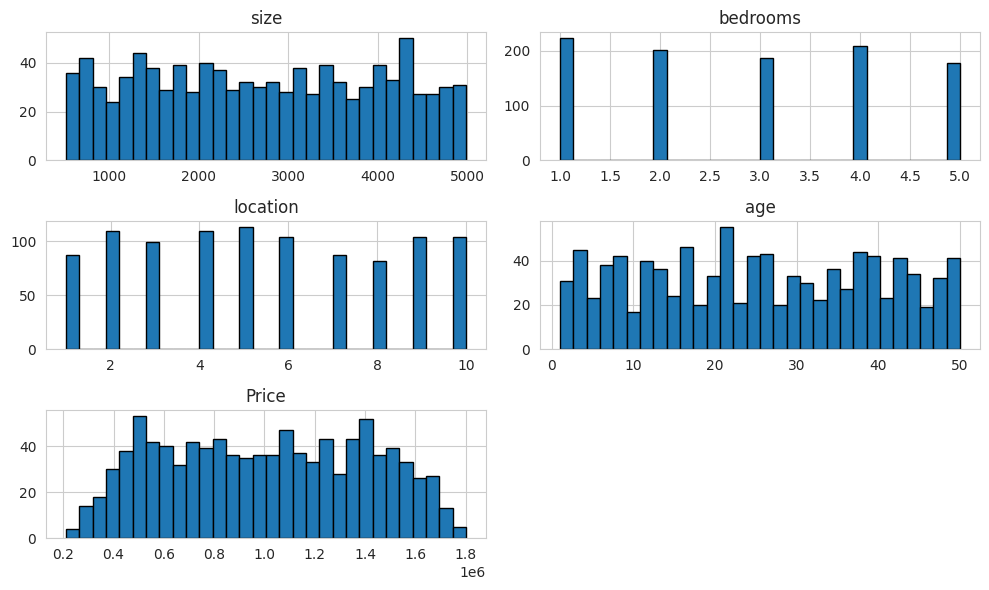

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot feature distributions
df.hist(figsize=(10,6), bins=30, edgecolor= "Black")
plt.tight_layout()
plt.show()

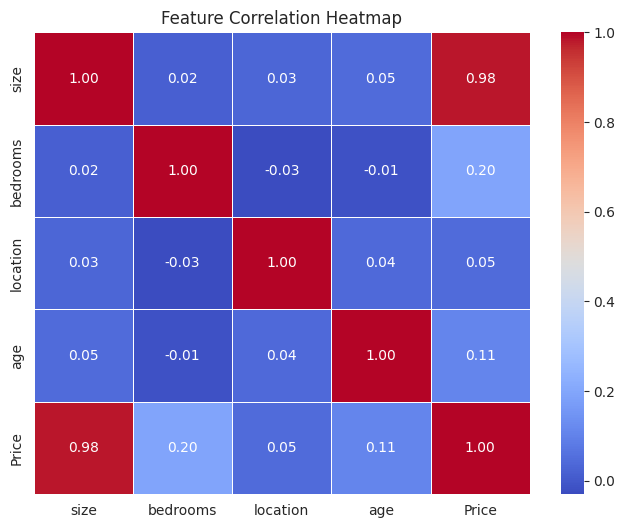

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

# Select features and target
x = df[["size", "bedrooms", "location", "age"]] # Changed 'locations' to 'location'
y = df['Price']

# Split data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Train Linear Regression Model
model = LinearRegression() # Use LinearRegression instead of LogisticRegression
model.fit(x_train,y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Predictions
y_pred = model.predict(x_test)

# Model performance
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance :\nMAE: {mae:.2f},R^2 Score:{r2:.2f}")


Model Performance :
MAE: 17025.97,R^2 Score:1.00


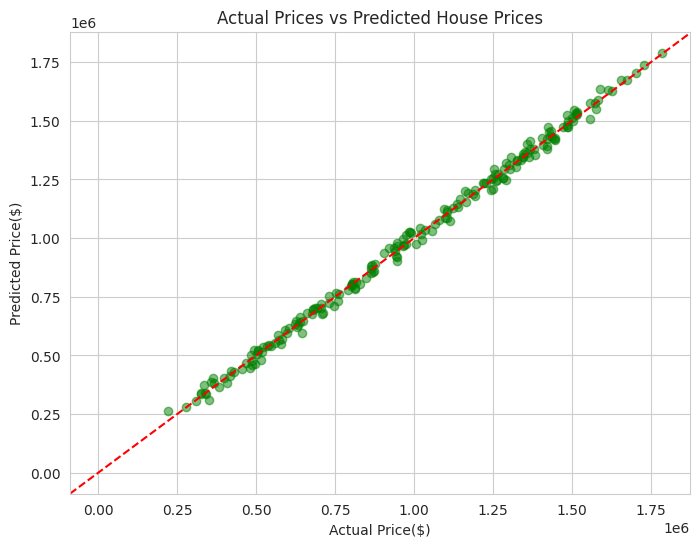

In [ ]:

plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.5,color="green")
plt.xlabel("Actual Price($)")
plt.ylabel("Predicted Price($)")
plt.title("Actual Prices vs Predicted House Prices")
plt.axline((0,0),slope=1, color="red", linestyle="--")   # Ideal fit line
plt.show()